In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
def lagrange(x, y, t):
  n = len(x)
  ans = 0
  for i in range(n):
    znam = 1
    delitel = 1
    for j in range(n):
      if i != j:
        znam = znam * (t - x[j])
        delitel = delitel * (x[i] - x[j])
    ans = ans +  y[i] * (znam / delitel)
  return ans

Задание 1.

1) Произвольно выбрать 5 точек с абсциссами от -1 до 1 и ординатами от 0 до 1 и построить интерполяционный многочлен Лагранжа. Какой степени многочлен будет построен?

rand_X: [-0.11885961 -0.79320904 -0.21190015 -0.35987479 -0.36898949]
rand_Y: [0.12098842 0.10395491 0.89683248 0.05241292 0.8960823 ]
[-0.11885961 -0.79320904 -0.21190015 -0.35987479 -0.36898949]
[-0.79320904 -0.7794468  -0.76568457 -0.75192234 -0.7381601  -0.72439787
 -0.71063564 -0.6968734  -0.68311117 -0.66934894 -0.65558671 -0.64182447
 -0.62806224 -0.61430001 -0.60053777 -0.58677554 -0.57301331 -0.55925107
 -0.54548884 -0.53172661 -0.51796437 -0.50420214 -0.49043991 -0.47667767
 -0.46291544 -0.44915321 -0.43539097 -0.42162874 -0.40786651 -0.39410427
 -0.38034204 -0.36657981 -0.35281758 -0.33905534 -0.32529311 -0.31153088
 -0.29776864 -0.28400641 -0.27024418 -0.25648194 -0.24271971 -0.22895748
 -0.21519524 -0.20143301 -0.18767078 -0.17390854 -0.16014631 -0.14638408
 -0.13262184 -0.11885961]


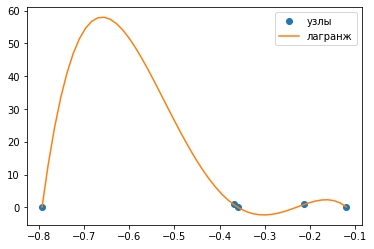

In [5]:
rand_X = np.random.sample(5) - 1
rand_Y = np.random.sample(5)
print('rand_X:', rand_X)
print('rand_Y:', rand_Y)
cord_X = np.linspace(np.min(rand_X), np.max(rand_X), 50)
print(rand_X)
print(cord_X)
cord_Y = [lagrange(rand_X, rand_Y, i) for i in cord_X]
plt.plot(rand_X, rand_Y, 'o', label="узлы")
plt.plot(cord_X, cord_Y, label="лагранж")
plt.legend()
plt.show()

Построен многочлен 4 степени

2) Аппроксимировать заданную функцию f(x) многочленом Ln(x),

f(x) = 1/(1+dx^2),     x∈[-1,1];
d=10+k,     k– номер студента в списке;
используя:
а) равномерное разбиение при n = 4; 10; 20; при этом
xi=-1+ih,     h=2/n,     i= 0,1,..,n; 

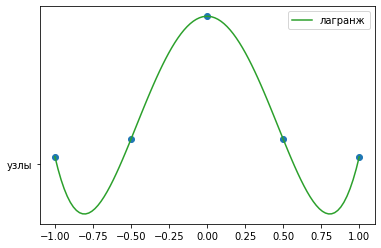

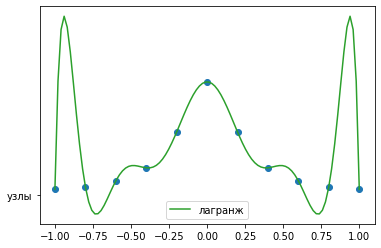

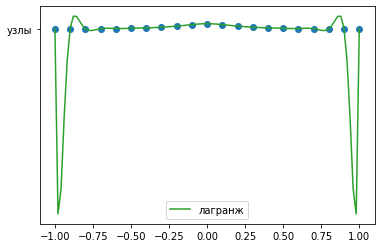

In [6]:
def f(x, d):
    return 1/(1 + d*x*x)
for n in [4, 10, 20]:
    h = 2/n
    x_precords = [(-1 + i*h) for i in range(n+1)]
    y_precords = [f(i, 20) for i in x_precords]
    x_cords = np.linspace(np.min(x_precords), np.max(x_precords), 100)
    y_cords = [lagrange(x_precords, y_precords, i) for i in x_cords]
    plt.plot(x_precords, y_precords, "o", "узлы")
    plt.plot(x_cords, y_cords, label="лагранж")
    plt.legend()
    plt.show()                      
        

2) Аппроксимировать заданную функцию f(x) многочленом Ln(x),

f(x) = 1/(1+dx^2),     x∈[-1,1];
d=10+k,     k– номер студента в списке;
используя:
б) узлы интерполяции - нули многочлена Чебышева 1-го рода Tn+1(x):

xi=cos ((2i+1)π/N),     N=2(n+1),     i= 0,1,..,n; 

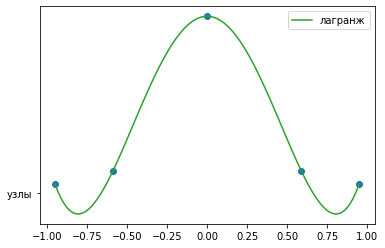

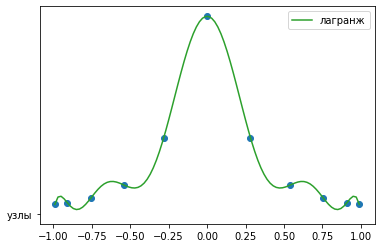

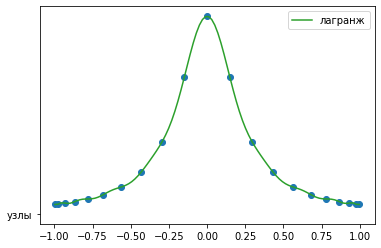

In [7]:
def take_x(i, N):
    return np.cos((2*i + 1)*np.pi / N)

for n in [4, 10, 20]:
    N = 2*(n + 1)
    x_precords = [take_x(i, N) for i in range(n+1)]
    y_precords = [f(i, 20) for i in x_precords]
    x_cords = np.linspace(np.min(x_precords), np.max(x_precords), 100)
    y_cords = [lagrange(x_precords, y_precords, i) for i in x_cords]
    plt.plot(x_precords, y_precords, "o", "узлы")
    plt.plot(x_cords, y_cords, label="лагранж")
    plt.legend()
    plt.show() 

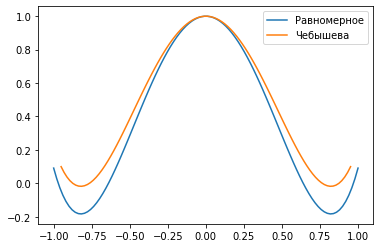

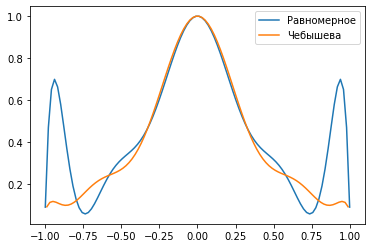

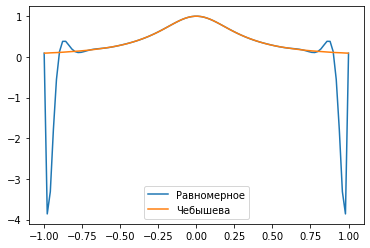

In [8]:
for n in [4, 10, 20]:
    h = 2/n
    x_precords = [(-1 + i*h) for i in range(n+1)]
    y_precords = [f(i, 10) for i in x_precords]
    x_cords = np.linspace(np.min(x_precords), np.max(x_precords), 100)
    y_cords = [lagrange(x_precords, y_precords, i) for i in x_cords]
    plt.plot(x_cords, y_cords, label="Равномерное")
    
    N = 2*(n + 1)
    x_precords = [take_x(i, N) for i in range(n+1)]
    y_precords = [f(i, 10) for i in x_precords]
    x_cords = np.linspace(np.min(x_precords), np.max(x_precords), 100)
    y_cords = [lagrange(x_precords, y_precords, i) for i in x_cords]
    plt.plot(x_cords, y_cords, label="Чебышева")
    plt.legend()
    plt.show() 

In [9]:
tabl = []
def zapoln_tabl_for_newton(x, y):
    global tabl
    tabl = [[0 for j in range(len(x) + 1)] for i in range(len(x) + 1)]
    for i in range(1, len(x)):
        tabl[2][i-1] = (y[i] - y[i-1]) / (x[i] - x[i-1])
    for i in range(3, len(x) + 1):
        for j in range(len(x) - i + 1):
            tabl[i][j] = (tabl[i-1][j+1] - tabl[i-1][j])/(x[j + i -1] - x[j])

In [10]:
def newton(x, y, t):
    zapoln_tabl_for_newton(x, y)
    ans = y[0]
    prod = 1
    for i in range(1, len(x)):
        prod = tabl[i+1][0]
        for j in range(i):
            prod = prod*(t-x[j])
        ans = ans + prod
    return ans

rand_X: [-0.11885961 -0.79320904 -0.21190015 -0.35987479 -0.36898949]
rand_Y: [0.12098842 0.10395491 0.89683248 0.05241292 0.8960823 ]


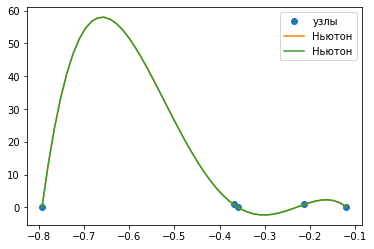

In [11]:
print('rand_X:', rand_X)
print('rand_Y:', rand_Y)
cord_X = np.linspace(np.min(rand_X) , np.max(rand_X), 50)
cord_newton_Y = [newton(rand_X, rand_Y, i) for i in cord_X]
cord_lagrange_Y = [lagrange(rand_X, rand_Y, i) for i in cord_X]
#print(lagrange(rand_X, rand_Y, 2))
plt.plot(rand_X, rand_Y, 'o', label="узлы")
plt.plot(cord_X, cord_newton_Y, label="Ньютон")
plt.plot(cord_X, cord_lagrange_Y, label="Ньютон")
plt.legend()
plt.show()

2) Аппроксимировать заданную функцию f(x) интерполяционным многочленом в любой форме при x∈[-1,1]; xi=-1+ih, h=2/n, i= 0,1,..,n; n=10,20

А) f(x)=|x|,     Б) f(x)=x3,     В) f(x)=cos(πx/2)

и показать, что в случае А интерполяционный процесс расходится, в случае Б- точное приближение, а в случае В- интерполяционный процесс сходится.

In [18]:
def f_a(x):
    return abs(x)
def f_b(x):
    return x**3
def f_c(x):
    return np.cos(3.1415926535*x/2)

f = |a|
n = 10


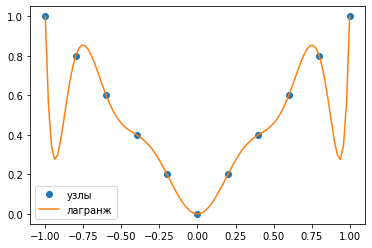

f = |a|
n = 20


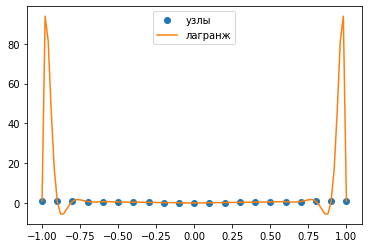

f = x^3
n = 10


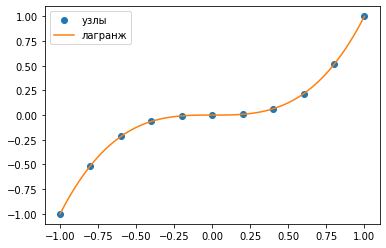

f = x^3
n = 20


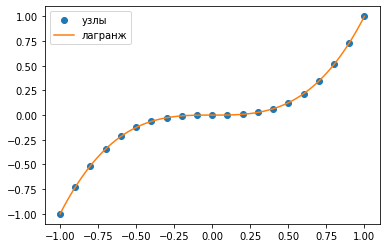

f = cos(πx/2
n = 10


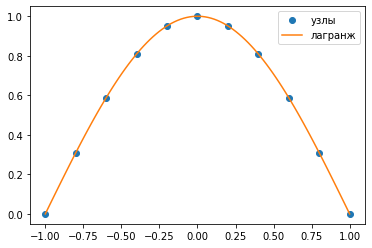

f = cos(πx/2
n = 20


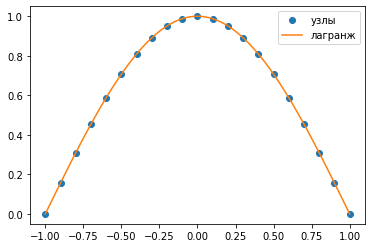

In [19]:
for F in range(3):
    for n in [10, 20]:
        h = 2/n
        x = [-1+i*h for i in range(n+1)]
        if F == 0:
            print('f = |a|')
            print('n =', n)
            y = [f_a(i) for i in x]
        elif F == 1:
            print('f = x^3')
            print('n =', n)
            y = [f_b(i) for i in x]
        else:
            print('f = cos(πx/2')
            print('n =', n) 
            y = [f_c(i) for i in x]
        x_cord = np.linspace(np.min(x), np.max(x), 100)
        y_cord = [lagrange(x, y, i) for i in x_cord]
        plt.plot(x, y, "o", label="узлы")
        plt.plot(x_cord, y_cord, label="лагранж")
        plt.legend()
        plt.show()